In [1]:
import sys
sys.path.append(r'C:\Users\Benson\Desktop\libsvm-master\python')
sys.path.append(r'C:/Users/Benson/Desktop/libsvm-master/tools/')
from grid import *
from svmutil import *
import numpy as np
import csv
import matplotlib.pyplot as plt
import scipy.spatial.distance as dist

# 第一部分

In [2]:
with open('./ML_HW5/X_train.csv') as f:
    reader = csv.reader(f)
    X_train = list(reader)
    
with open('./ML_HW5/Y_train.csv') as f:
    reader = csv.reader(f)
    y_train = list(reader)
    
X_train = np.array(X_train).astype(float)
print(X_train.shape)
X_train = X_train.tolist()

y_train = np.array(y_train).reshape(-1).astype(int)
y_train = y_train.tolist()

(5000, 784)


In [3]:
# Make input file for training mnist 5000x784 with label 5000x1
f = open("train", "w")
for item, line in enumerate(X_train):
    f.write("{} ".format(y_train[item]))
    for index, word in enumerate(line):
        f.write("{}:{} ".format(index+1, word))
    f.write("\n")
f.close()

In [4]:
with open('./ML_HW5/X_test.csv') as f:
    reader = csv.reader(f)
    X_test = list(reader)
    
with open('./ML_HW5/Y_test.csv') as f:
    reader = csv.reader(f)
    y_test = list(reader)
    
X_test = np.array(X_test).astype(float)
print(X_test.shape)
X_test = X_test.tolist()

y_test = np.array(y_test).reshape(-1).astype(int)
y_test = y_test.tolist()

(2500, 784)


In [5]:
# Make input file for testing mnist 2500x784 with label 2500x1
f = open("test", "w")
for item, line in enumerate(X_test):
    f.write("{} ".format(y_test[item]))
    for index, word in enumerate(line):
        f.write("{}:{} ".format(index+1, word))
    f.write("\n")
f.close()

In [6]:
%%time
#-c for cost 
#-t 0 for linear kernel
m = svm_train(y_train, X_train, '-c 4 -t 0')
p_label, p_acc, p_val = svm_predict(y_test, X_test, m)
ACC, MSE, SCC = evaluations(y_test, p_label)
print("ACC: {}\nMSE: {}\nSCC: {}".format(ACC, MSE, SCC))

Accuracy = 95% (2375/2500) (classification)
ACC: 95.0
MSE: 0.1412
SCC: 0.9307635535100904
Wall time: 3.95 s


In [7]:
%%time
#-t 1 for polynomial kernel
m = svm_train(y_train, X_train, '-c 4 -t 1 -g 0.01')
p_label, p_acc, p_val = svm_predict(y_test, X_test, m)
ACC, MSE, SCC = evaluations(y_test, p_label)
print("ACC: {}\nMSE: {}\nSCC: {}".format(ACC, MSE, SCC))

Accuracy = 97.76% (2444/2500) (classification)
ACC: 97.76
MSE: 0.0644
SCC: 0.9680548927613457
Wall time: 5.14 s


In [8]:
%%time
#-t 2 for radial basis function
m = svm_train(y_train, X_train, '-c 4 -t 2')
p_label, p_acc, p_val = svm_predict(y_test, X_test, m)
ACC, MSE, SCC = evaluations(y_test, p_label)
print("ACC: {}\nMSE: {}\nSCC: {}".format(ACC, MSE, SCC))

Accuracy = 96.16% (2404/2500) (classification)
ACC: 96.16
MSE: 0.1244
SCC: 0.9389230880351884
Wall time: 5.46 s


In [9]:
%%time
#-t 4 for user-defined kernel function (Linear + RBF)
gamma = 2e-3

x_tr = np.array(X_train)
K_train=np.zeros( (x_tr.shape[0],x_tr.shape[0]+1) )
K_train[:,1:]=np.exp(-gamma * dist.cdist(x_tr, x_tr, 'sqeuclidean')) * np.dot(x_tr, x_tr.T)
K_train[:,:1]=np.arange(x_tr.shape[0])[:,np.newaxis]+1
# print(K_train.shape)

m = svm_train(y_train, [list(row) for row in K_train], '-c 10 -t 4 -g 1000')

x_ts = np.array(X_test)
K_test=np.zeros( (x_ts.shape[0],x_tr.shape[0]+1) )
K_test[:,1:]=np.exp(-gamma * dist.cdist(x_ts, x_tr, 'sqeuclidean')) * np.dot(x_ts, x_tr.T)
K_test[:,:1]=np.arange(x_ts.shape[0])[:,np.newaxis]+1
# print(K_test.shape)

p_label, p_acc, p_val = svm_predict(y_test, K_test, m)
ACC, MSE, SCC = evaluations(y_test, p_label)
print("ACC: {}\nMSE: {}\nSCC: {}".format(ACC, MSE, SCC))

Accuracy = 97.48% (2437/2500) (classification)
ACC: 97.48
MSE: 0.0688
SCC: 0.9659022634891475
Wall time: 48.2 s


In [10]:
# Make input file for training mnist 5000x784 with label 5000x1
f = open("s", "w")
for item, line in enumerate(X_train):
    f.write("{} ".format(y_train[item]))
    for index, word in enumerate(line):
        f.write("{}:{} ".format(index+1, word))
    f.write("\n")
# f.write("Now the file has more content!")
f.close()


In [11]:
y, x = svm_read_problem('./s')
# m = svm_train(y[:200], x[:200], '-c 4')
# p_label, p_acc, p_val = svm_predict(y[200:], x[200:], m)

In [12]:
m = svm_train(y, x, '-c 4 -t 2')
p_label, p_acc, p_val = svm_predict(y_test, X_test, m)

Accuracy = 96.16% (2404/2500) (classification)


In [13]:
rate, param = find_parameters('./s', '-log2c -6,6,2 -log2g null -t 0 -v 5')

[local] 0.0 96.14 (best c=1.0, rate=96.14)
[local] -4.0 96.86 (best c=0.0625, rate=96.86)
[local] 4.0 96.14 (best c=0.0625, rate=96.86)
[local] -6.0 96.96 (best c=0.015625, rate=96.96)
[local] 2.0 96.14 (best c=0.015625, rate=96.96)
[local] -2.0 96.34 (best c=0.015625, rate=96.96)
[local] 6.0 96.14 (best c=0.015625, rate=96.96)
0.015625 96.96


In [14]:
rate, param = find_parameters('./s', '-log2c -6,6,2 -log2g null -t 1 -v 5')

[local] 0.0 32.54 (best c=1.0, rate=32.54)
[local] -4.0 28.42 (best c=1.0, rate=32.54)
[local] 4.0 81.66 (best c=16.0, rate=81.66)
[local] -6.0 28.42 (best c=16.0, rate=81.66)
[local] 2.0 58.68 (best c=16.0, rate=81.66)
[local] -2.0 28.42 (best c=16.0, rate=81.66)
[local] 6.0 91.5 (best c=64.0, rate=91.5)
64.0 91.5


In [15]:
rate, param = find_parameters('./s', '-log2c 0,6,6 -log2g -6,0,6 -t 2 -v 5')

[local] 6.0 0.0 31.62 (best c=64.0, g=1.0, rate=31.62)
[local] 6.0 -6.0 98.36 (best c=64.0, g=0.015625, rate=98.36)
[local] 0.0 0.0 30.12 (best c=64.0, g=0.015625, rate=98.36)
[local] 0.0 -6.0 98.16 (best c=64.0, g=0.015625, rate=98.36)
64.0 0.015625 98.36


# 第二部分

In [16]:
with open('./ML_HW5/Plot_X.csv') as f:
    reader = csv.reader(f)
    X_plot = list(reader)
    
with open('./ML_HW5/Plot_Y.csv') as f:
    reader = csv.reader(f)
    y_plot = list(reader)

In [17]:
X_plot = np.array(X_plot).astype(float)
print(X_plot.shape)
# X_plot = X_plot.tolist()

y_plot = np.array(y_plot).reshape(-1).astype(int)
y_plot = y_plot + 1
y_plot

(3000, 2)


array([1, 1, 1, ..., 3, 3, 3])

In [18]:
X_plot

array([[ 0.27217641, -1.43199094],
       [ 2.08388828, -3.21062961],
       [ 1.30301984,  2.57824947],
       ...,
       [10.74669196, -6.91515559],
       [13.046062  ,  2.13844743],
       [12.65009315, -5.03801509]])

In [19]:
f = open("origin_PLOT", "w")
for item, line in enumerate(X_plot):
    f.write("{} ".format(y_plot[item]))
    for index, word in enumerate(line):
        f.write("{}:{} ".format(index+1, word))
    f.write("\n")
f.close()

In [20]:
import matplotlib.pyplot as plt

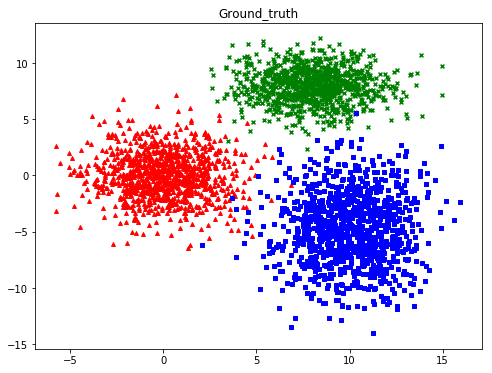

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(X_plot[:1000, 0], X_plot[:1000, 1], c='r', s=15, marker='^')
plt.scatter(X_plot[1000:2000, 0], X_plot[1000:2000, 1], c='g', s=15, marker='x')
plt.scatter(X_plot[2000:3000, 0], X_plot[2000:3000, 1], c='b', s=15, marker='s')
plt.title("Ground_truth")
plt.savefig('Ground_truth')
plt.show()

[Linear]
Accuracy = 99.5% (2985/3000) (classification)
ACC: 99.5
MSE: 0.014
SCC: 0.9791208791208791


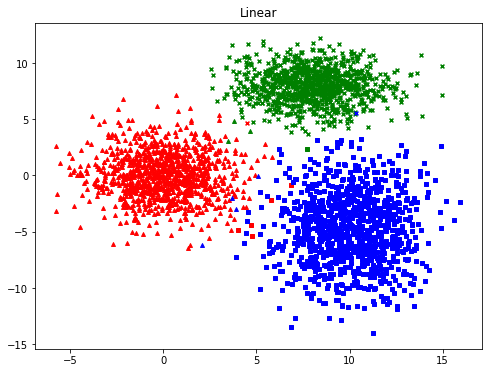

In [22]:
y, x = svm_read_problem("./origin_PLOT")
m = svm_train(y, x, '-t 0 -c 1000')
print("[Linear]")
p_label, p_acc, p_val = svm_predict(y, x, m)
ACC, MSE, SCC = evaluations(y, p_label)
print("ACC: {}\nMSE: {}\nSCC: {}".format(ACC, MSE, SCC))

p_la = np.array(p_label).reshape(-1)
plt.figure(figsize=(8, 6))
c_index = np.where(p_la==1)
c_index2 = np.where(p_la==2)
c_index3 = np.where(p_la==3)
plt.scatter(X_plot[c_index[0][c_index[0]<1000], 0], X_plot[c_index[0][c_index[0]<1000], 1], c='r', s=15, marker='^')
plt.scatter(X_plot[c_index[0][(c_index[0]>=1000) & (c_index[0]<2000)], 0], X_plot[c_index[0][(c_index[0]>=1000) & (c_index[0]<2000)], 1], c='g', s=15, marker='^')
plt.scatter(X_plot[c_index[0][(c_index[0]>=2000) & (c_index[0]<3000)], 0], X_plot[c_index[0][(c_index[0]>=2000) & (c_index[0]<3000)], 1], c='b', s=15, marker='^')

plt.scatter(X_plot[c_index2[0][c_index2[0]<1000], 0], X_plot[c_index2[0][c_index2[0]<1000], 1], c='r', s=15, marker='x')
plt.scatter(X_plot[c_index2[0][(c_index2[0]>=1000) & (c_index2[0]<2000)], 0], X_plot[c_index2[0][(c_index2[0]>=1000) & (c_index2[0]<2000)], 1], c='g', s=15, marker='x')
plt.scatter(X_plot[c_index2[0][(c_index2[0]>=2000) & (c_index2[0]<3000)], 0], X_plot[c_index2[0][(c_index2[0]>=2000) & (c_index2[0]<3000)], 1], c='b', s=15, marker='x')

plt.scatter(X_plot[c_index3[0][c_index3[0]<1000], 0], X_plot[c_index3[0][c_index3[0]<1000], 1], c='r', s=15, marker='s')
plt.scatter(X_plot[c_index3[0][(c_index3[0]>=1000) & (c_index3[0]<2000)], 0], X_plot[c_index3[0][(c_index3[0]>=1000) & (c_index3[0]<2000)], 1], c='g', s=15, marker='s')
plt.scatter(X_plot[c_index3[0][(c_index3[0]>=2000) & (c_index3[0]<3000)], 0], X_plot[c_index3[0][(c_index3[0]>=2000) & (c_index3[0]<3000)], 1], c='b', s=15, marker='s')
plt.title("Linear")
plt.savefig('Linear')
plt.show()

[Poly]
Accuracy = 99.3333% (2980/3000) (classification)
ACC: 99.33333333333333
MSE: 0.019666666666666666
SCC: 0.9707379859698256


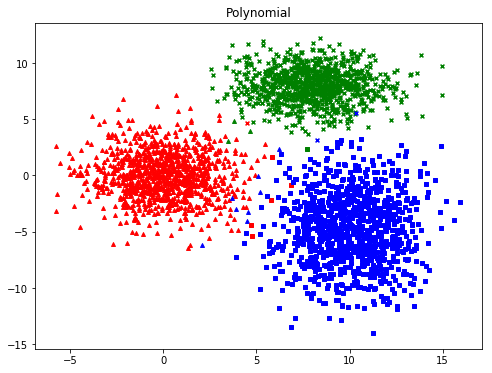

In [23]:
m = svm_train(y, x, '-t 1')
print("[Poly]")
p_label, p_acc, p_val = svm_predict(y, x, m)
ACC, MSE, SCC = evaluations(y, p_label)
print("ACC: {}\nMSE: {}\nSCC: {}".format(ACC, MSE, SCC))

p_la = np.array(p_label).reshape(-1)
plt.figure(figsize=(8, 6))
c_index = np.where(p_la==1)
c_index2 = np.where(p_la==2)
c_index3 = np.where(p_la==3)

plt.scatter(X_plot[c_index[0][c_index[0]<1000], 0], X_plot[c_index[0][c_index[0]<1000], 1], c='r', s=15, marker='^')
plt.scatter(X_plot[c_index[0][(c_index[0]>=1000) & (c_index[0]<2000)], 0], X_plot[c_index[0][(c_index[0]>=1000) & (c_index[0]<2000)], 1], c='g', s=15, marker='^')
plt.scatter(X_plot[c_index[0][(c_index[0]>=2000) & (c_index[0]<3000)], 0], X_plot[c_index[0][(c_index[0]>=2000) & (c_index[0]<3000)], 1], c='b', s=15, marker='^')

plt.scatter(X_plot[c_index2[0][c_index2[0]<1000], 0], X_plot[c_index2[0][c_index2[0]<1000], 1], c='r', s=15, marker='x')
plt.scatter(X_plot[c_index2[0][(c_index2[0]>=1000) & (c_index2[0]<2000)], 0], X_plot[c_index2[0][(c_index2[0]>=1000) & (c_index2[0]<2000)], 1], c='g', s=15, marker='x')
plt.scatter(X_plot[c_index2[0][(c_index2[0]>=2000) & (c_index2[0]<3000)], 0], X_plot[c_index2[0][(c_index2[0]>=2000) & (c_index2[0]<3000)], 1], c='b', s=15, marker='x')

plt.scatter(X_plot[c_index3[0][c_index3[0]<1000], 0], X_plot[c_index3[0][c_index3[0]<1000], 1], c='r', s=15, marker='s')
plt.scatter(X_plot[c_index3[0][(c_index3[0]>=1000) & (c_index3[0]<2000)], 0], X_plot[c_index3[0][(c_index3[0]>=1000) & (c_index3[0]<2000)], 1], c='g', s=15, marker='s')
plt.scatter(X_plot[c_index3[0][(c_index3[0]>=2000) & (c_index3[0]<3000)], 0], X_plot[c_index3[0][(c_index3[0]>=2000) & (c_index3[0]<3000)], 1], c='b', s=15, marker='s')
plt.title("Polynomial")
plt.savefig('Polynomial')
plt.show()

[RBF]
Accuracy = 99.4667% (2984/3000) (classification)
ACC: 99.46666666666667
MSE: 0.01633333333333333
SCC: 0.9756455362364226


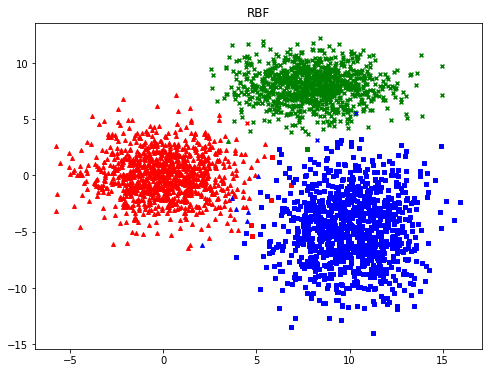

In [24]:
m = svm_train(y, x, '-t 2')
print("[RBF]")
p_label, p_acc, p_val = svm_predict(y, x, m)
ACC, MSE, SCC = evaluations(y, p_label)
print("ACC: {}\nMSE: {}\nSCC: {}".format(ACC, MSE, SCC))

p_la = np.array(p_label).reshape(-1)
plt.figure(figsize=(8, 6))
c_index = np.where(p_la==1)
c_index2 = np.where(p_la==2)
c_index3 = np.where(p_la==3)

plt.scatter(X_plot[c_index[0][c_index[0]<1000], 0], X_plot[c_index[0][c_index[0]<1000], 1], c='r', s=15, marker='^')
plt.scatter(X_plot[c_index[0][(c_index[0]>=1000) & (c_index[0]<2000)], 0], X_plot[c_index[0][(c_index[0]>=1000) & (c_index[0]<2000)], 1], c='g', s=15, marker='^')
plt.scatter(X_plot[c_index[0][(c_index[0]>=2000) & (c_index[0]<3000)], 0], X_plot[c_index[0][(c_index[0]>=2000) & (c_index[0]<3000)], 1], c='b', s=15, marker='^')

plt.scatter(X_plot[c_index2[0][c_index2[0]<1000], 0], X_plot[c_index2[0][c_index2[0]<1000], 1], c='r', s=15, marker='x')
plt.scatter(X_plot[c_index2[0][(c_index2[0]>=1000) & (c_index2[0]<2000)], 0], X_plot[c_index2[0][(c_index2[0]>=1000) & (c_index2[0]<2000)], 1], c='g', s=15, marker='x')
plt.scatter(X_plot[c_index2[0][(c_index2[0]>=2000) & (c_index2[0]<3000)], 0], X_plot[c_index2[0][(c_index2[0]>=2000) & (c_index2[0]<3000)], 1], c='b', s=15, marker='x')

plt.scatter(X_plot[c_index3[0][c_index3[0]<1000], 0], X_plot[c_index3[0][c_index3[0]<1000], 1], c='r', s=15, marker='s')
plt.scatter(X_plot[c_index3[0][(c_index3[0]>=1000) & (c_index3[0]<2000)], 0], X_plot[c_index3[0][(c_index3[0]>=1000) & (c_index3[0]<2000)], 1], c='g', s=15, marker='s')
plt.scatter(X_plot[c_index3[0][(c_index3[0]>=2000) & (c_index3[0]<3000)], 0], X_plot[c_index3[0][(c_index3[0]>=2000) & (c_index3[0]<3000)], 1], c='b', s=15, marker='s')
plt.title("RBF")
plt.savefig('RBF')
plt.show()

[Linear + RBF]
Accuracy = 99.5667% (2987/3000) (classification)
ACC: 99.56666666666666
MSE: 0.013333333333333334
SCC: 0.9801006534004356


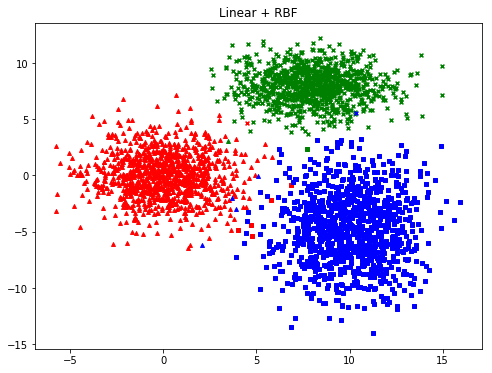

In [32]:
y, x = svm_read_problem('./origin_PLOT')

x= np.array([list(xx.values()) for xx in x]).reshape(-1, len(list(x[0].values())))
# x_ts = np.array([list(xx.values()) for xx in x_ts]).reshape(-1, len(list(x_ts[0].values())))

gamma = 0.01
sigma = 64
K_train=np.zeros( (x.shape[0],x.shape[0]+1) )
K_train[:,1:]=np.exp(-gamma * dist.cdist(x, x, 'sqeuclidean') / sigma**2) * np.dot(x,x.T)
K_train[:,:1]=np.arange(x.shape[0])[:,np.newaxis]+1
K_train.shape

m = svm_train(y, [list(row) for row in K_train], '-c 4 -t 4')

K_test=np.zeros( (x.shape[0],x.shape[0]+1) )
K_test[:,1:]=np.exp(-gamma * dist.cdist(x, x, 'sqeuclidean') / sigma**2) * np.dot(x,x.T)
K_test[:,:1]=np.arange(x.shape[0])[:,np.newaxis]+1
K_test.shape

print("[Linear + RBF]")
p_label, p_acc, p_val = svm_predict(y, [list(row) for row in K_test], m)
ACC, MSE, SCC = evaluations(y, p_label)
print("ACC: {}\nMSE: {}\nSCC: {}".format(ACC, MSE, SCC))

p_la = np.array(p_label).reshape(-1)
plt.figure(figsize=(8, 6))
c_index = np.where(p_la==1)
c_index2 = np.where(p_la==2)
c_index3 = np.where(p_la==3)

plt.scatter(X_plot[c_index[0][c_index[0]<1000], 0], X_plot[c_index[0][c_index[0]<1000], 1], c='r', s=15, marker='^')
plt.scatter(X_plot[c_index[0][(c_index[0]>=1000) & (c_index[0]<2000)], 0], X_plot[c_index[0][(c_index[0]>=1000) & (c_index[0]<2000)], 1], c='g', s=15, marker='^')
plt.scatter(X_plot[c_index[0][(c_index[0]>=2000) & (c_index[0]<3000)], 0], X_plot[c_index[0][(c_index[0]>=2000) & (c_index[0]<3000)], 1], c='b', s=15, marker='^')

plt.scatter(X_plot[c_index2[0][c_index2[0]<1000], 0], X_plot[c_index2[0][c_index2[0]<1000], 1], c='r', s=15, marker='x')
plt.scatter(X_plot[c_index2[0][(c_index2[0]>=1000) & (c_index2[0]<2000)], 0], X_plot[c_index2[0][(c_index2[0]>=1000) & (c_index2[0]<2000)], 1], c='g', s=15, marker='x')
plt.scatter(X_plot[c_index2[0][(c_index2[0]>=2000) & (c_index2[0]<3000)], 0], X_plot[c_index2[0][(c_index2[0]>=2000) & (c_index2[0]<3000)], 1], c='b', s=15, marker='x')

plt.scatter(X_plot[c_index3[0][c_index3[0]<1000], 0], X_plot[c_index3[0][c_index3[0]<1000], 1], c='r', s=15, marker='s')
plt.scatter(X_plot[c_index3[0][(c_index3[0]>=1000) & (c_index3[0]<2000)], 0], X_plot[c_index3[0][(c_index3[0]>=1000) & (c_index3[0]<2000)], 1], c='g', s=15, marker='s')
plt.scatter(X_plot[c_index3[0][(c_index3[0]>=2000) & (c_index3[0]<3000)], 0], X_plot[c_index3[0][(c_index3[0]>=2000) & (c_index3[0]<3000)], 1], c='b', s=15, marker='s')
plt.title("Linear + RBF")
plt.savefig('Linear + RBF')
plt.show()

In [31]:
%%time
#-t 4 for user-defined kernel function (Linear + RBF)
gamma = 2e-3

x_tr = np.array(X_train)
K_train=np.zeros( (x_tr.shape[0],x_tr.shape[0]+1) )
K_train[:,1:]=np.exp(-gamma * dist.cdist(x_tr, x_tr, 'sqeuclidean')) + np.dot(x_tr, x_tr.T)
K_train[:,:1]=np.arange(x_tr.shape[0])[:,np.newaxis]+1
# print(K_train.shape)

m = svm_train(y_train, [list(row) for row in K_train], '-c 10 -t 4 -g 10')

x_ts = np.array(X_test)
K_test=np.zeros( (x_ts.shape[0],x_tr.shape[0]+1) )
K_test[:,1:]=np.exp(-gamma * dist.cdist(x_ts, x_tr, 'sqeuclidean')) + np.dot(x_ts, x_tr.T)
K_test[:,:1]=np.arange(x_ts.shape[0])[:,np.newaxis]+1
# print(K_test.shape)

p_label, p_acc, p_val = svm_predict(y_test, K_test, m)
ACC, MSE, SCC = evaluations(y_test, p_label)
print("ACC: {}\nMSE: {}\nSCC: {}".format(ACC, MSE, SCC))

Accuracy = 95% (2375/2500) (classification)
ACC: 95.0
MSE: 0.1412
SCC: 0.9307635535100904
Wall time: 50.1 s
